<a href="https://colab.research.google.com/github/devu-13here/Face-Mask-Detection/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:08<00:00, 23.9MB/s]
100% 163M/163M [00:08<00:00, 20.6MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1310.jpg', 'with_mask_3085.jpg', 'with_mask_2307.jpg', 'with_mask_3253.jpg', 'with_mask_3430.jpg']
['with_mask_3188.jpg', 'with_mask_838.jpg', 'with_mask_901.jpg', 'with_mask_1191.jpg', 'with_mask_386.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2366.jpg', 'without_mask_1824.jpg', 'without_mask_1374.jpg', 'without_mask_114.jpg', 'without_mask_1478.jpg']
['without_mask_2899.jpg', 'without_mask_1088.jpg', 'without_mask_920.jpg', 'without_mask_3498.jpg', 'without_mask_1672.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

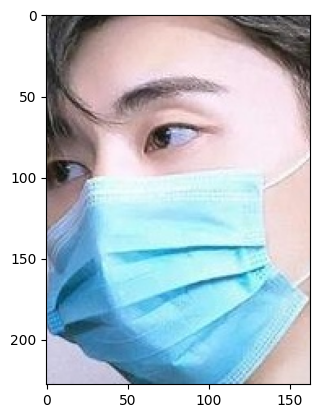

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

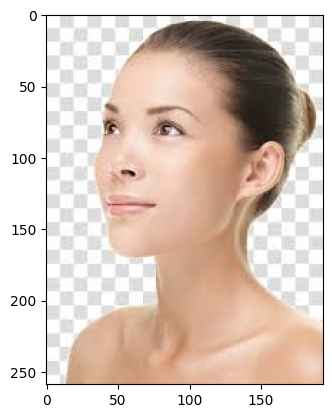

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[180, 191, 138],
        [182, 191, 141],
        [193, 200, 154],
        ...,
        [255, 253, 250],
        [250, 244, 239],
        [229, 223, 213]],

       [[177, 192, 136],
        [180, 194, 140],
        [182, 192, 143],
        ...,
        [234, 230, 227],
        [183, 178, 173],
        [133, 127, 119]],

       [[187, 203, 146],
        [176, 192, 135],
        [187, 202, 149],
        ...,
        [147, 143, 140],
        [119, 114, 110],
        [104, 100,  94]],

       ...,

       [[ 88, 126, 147],
        [ 88, 124, 145],
        [ 79, 109, 130],
        ...,
        [112, 117, 129],
        [108, 113, 126],
        [120, 126, 139]],

       [[ 53,  82,  95],
        [ 37,  64,  76],
        [ 24,  43,  55],
        ...,
        [110, 116, 130],
        [101, 107, 121],
        [118, 124, 138]],

       [[  5,  17,  31],
        [  3,  15,  26],
        [  8,  15,  26],
        ...,
        [ 97, 103, 117],
        [108, 114, 128],
        [100, 106, 120]]], dtype=uint8)
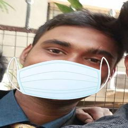

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[162, 164, 176],
        [206, 208, 220],
        [193, 198, 210],
        ...,
        [ 78,  74,  73],
        [116, 112, 110],
        [196, 192, 189]],

       [[208, 211, 223],
        [189, 192, 203],
        [165, 169, 180],
        ...,
        [ 69,  64,  65],
        [ 73,  69,  69],
        [139, 135, 133]],

       [[184, 188, 199],
        [158, 162, 173],
        [153, 157, 168],
        ...,
        [ 66,  63,  65],
        [ 71,  67,  70],
        [ 84,  80,  81]],

       ...,

       [[200, 199, 195],
        [198, 197, 193],
        [197, 196, 194],
        ...,
        [ 75,  67,  65],
        [ 74,  66,  63],
        [ 74,  66,  63]],

       [[214, 213, 209],
        [212, 211, 207],
        [207, 206, 204],
        ...,
        [ 77,  69,  66],
        [ 78,  70,  67],
        [ 77,  69,  66]],

       [[223, 222, 219],
        [218, 217, 215],
        [218, 217, 215],
        ...,
        [ 79,  69,  67],
        [ 76,  66,  64],
        [ 80,  71,  66]]], dtype=uint8)
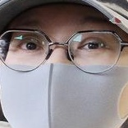

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.63529412, 0.64313725, 0.69019608],
        [0.80784314, 0.81568627, 0.8627451 ],
        [0.75686275, 0.77647059, 0.82352941],
        ...,
        [0.30588235, 0.29019608, 0.28627451],
        [0.45490196, 0.43921569, 0.43137255],
        [0.76862745, 0.75294118, 0.74117647]],

       [[0.81568627, 0.82745098, 0.8745098 ],
        [0.74117647, 0.75294118, 0.79607843],
        [0.64705882, 0.6627451 , 0.70588235],
        ...,
        [0.27058824, 0.25098039, 0.25490196],
        [0.28627451, 0.27058824, 0.27058824],
        [0.54509804, 0.52941176, 0.52156863]],

       [[0.72156863, 0.7372549 , 0.78039216],
        [0.61960784, 0.63529412, 0.67843137],
        [0.6       , 0.61568627, 0.65882353],
        ...,
        [0.25882353, 0.24705882, 0.25490196],
        [0.27843137, 0.2627451 , 0.2745098 ],
        [0.32941176, 0.31372549, 0.31764706]],

       ...,

       [[0.78431373, 0.78039216, 0.76470588],
        [0.77647059, 0.77254902, 0.75686275],
        [0.77254902, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - acc: 0.7117 - loss: 0.6438 - val_acc: 0.8727 - val_loss: 0.3031
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8690 - loss: 0.3147 - val_acc: 0.8975 - val_loss: 0.2353
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9078 - loss: 0.2424 - val_acc: 0.8826 - val_loss: 0.2762
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9076 - loss: 0.2156 - val_acc: 0.9041 - val_loss: 0.2004
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9210 - loss: 0.1891 - val_acc: 0.9140 - val_loss: 0.1980


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9290 - loss: 0.2296
Test Accuracy = 0.9205824136734009


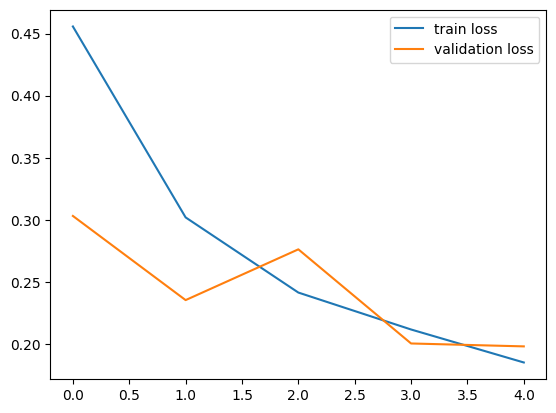

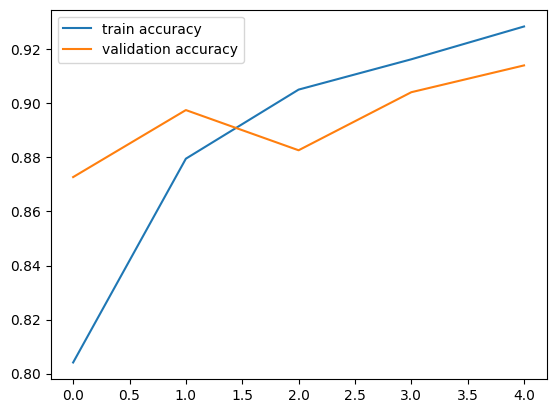

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.png


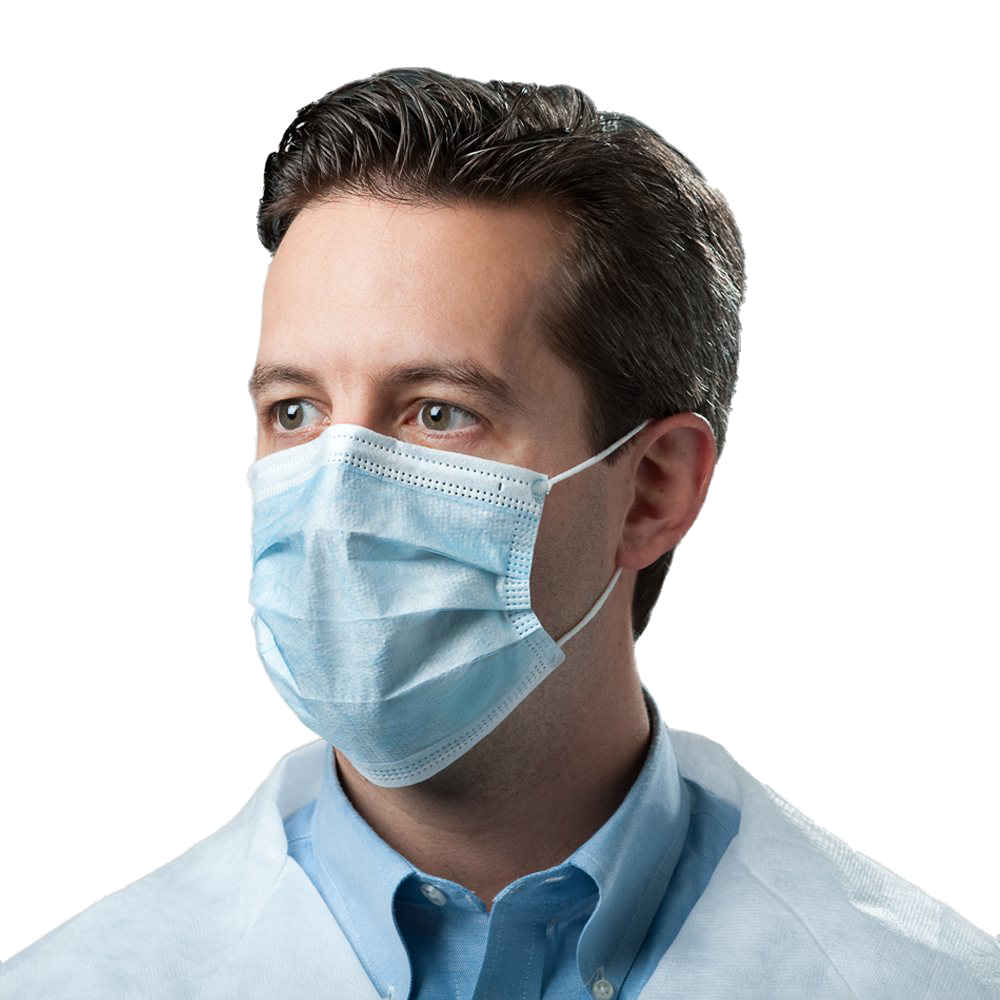

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
[[0.42272103 0.5326292 ]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')